<a href="https://colab.research.google.com/github/arceuzvx/Cybersecurity_resources/blob/main/disasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 12998 files belonging to 6 classes.
Using 10399 files for training.
Found 12998 files belonging to 6 classes.
Using 2599 files for validation.
['Damaged_Infrastructure', 'Fire_Disaster', 'Human_Damage', 'Land_Disaster', 'Non_Damage', 'Water_Disaster']


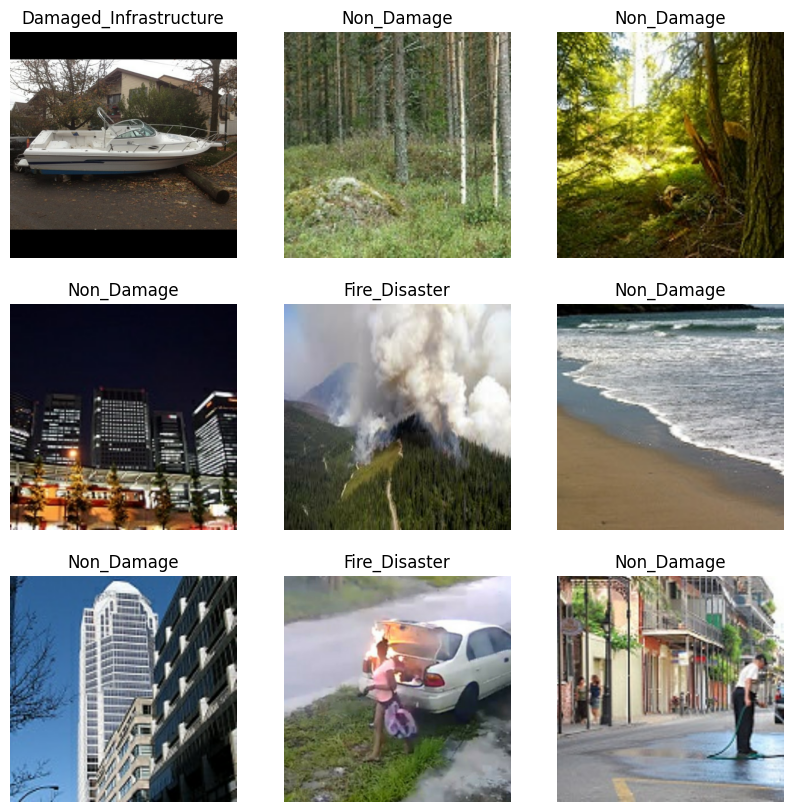

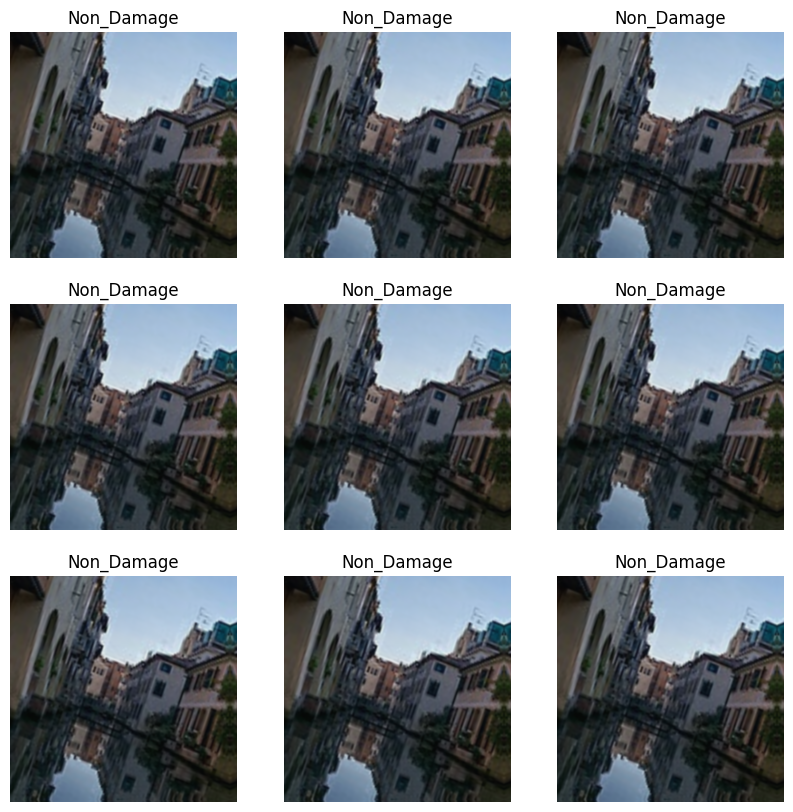

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load and preprocess datasets
dataset_path = "/content/drive/MyDrive/Comprehensive Disaster Dataset(CDD)"
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(512, 512),
    batch_size=64
)
ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(512, 512),
    batch_size=64
)

# Retrieve class names
class_names = ds_train.class_names
print(class_names)

# Display a batch of training images
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Define image augmentation
# Import the layers module
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(height_factor=(-0.2, -0.3), width_factor=(-0.2, -0.3)),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

# Plot augmented images
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    first_image = images[0]
    augmented_images = data_augmentation(tf.expand_dims(first_image, 0), training=True)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # The augmented_images tensor has shape (1, 512, 512, 3)
        # Access the first image using index 0
        augmented_image = augmented_images[0].numpy().astype("uint8")
        plt.imshow(augmented_image)
        plt.title(class_names[labels[0]])
        plt.axis("off")

plt.show()